In [ ]:
import os
import glob
from IPython.display import Image as IPImage
import pandas as pd             
import numpy as np              
import matplotlib.pyplot as plt 
import seaborn as sns           
from PIL import Image           
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from keras.layers import Flatten, Dense, Activation, Dropout
from keras import models, optimizers
from keras.models import Sequential
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json
from keras.regularizers import l2
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications import DenseNet121
from keras.applications.densenet import DenseNet121, preprocess_input
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
train_data = '/content/cervical_cancer'

pd.DataFrame(
    os.listdir(train_data),
    columns=['File Name']
)

,File Name
0,cervic_Parabasal
1,cervic_Dyskeratotic
2,cervic_Koilocytotic
3,cervic_Superficial-Intermediate
4,.ipynb_checkpoints
5,cervic_Metaplastic


In [ ]:
train_files = [i for i in glob.glob(train_data + "/*/*")]

np.random.shuffle(train_files)

labels = [os.path.dirname(i).split("/")[-1] for i in train_files]

data = zip(train_files, labels)

training_data = pd.DataFrame(data, columns=["Path", "Label"])

training_data

,Path,Label
0,/content/cervical_cancer/cervic_Parabasal/cerv...,cervic_Parabasal
1,/content/cervical_cancer/cervic_Dyskeratotic/c...,cervic_Dyskeratotic
2,/content/cervical_cancer/cervic_Superficial-In...,cervic_Superficial-Intermediate
3,/content/cervical_cancer/cervic_Metaplastic/ce...,cervic_Metaplastic
4,/content/cervical_cancer/cervic_Metaplastic/ce...,cervic_Metaplastic
...,...,...
4995,/content/cervical_cancer/cervic_Dyskeratotic/c...,cervic_Dyskeratotic
4996,/content/cervical_cancer/cervic_Parabasal/cerv...,cervic_Parabasal
4997,/content/cervical_cancer/cervic_Dyskeratotic/c...,cervic_Dyskeratotic
4998,/content/cervical_cancer/cervic_Metaplastic/ce...,cervic_Metaplastic


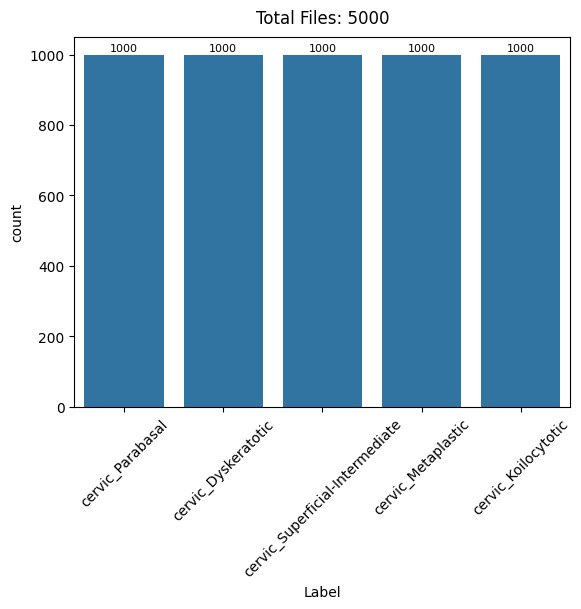

In [ ]:
ax = sns.countplot(x=training_data["Label"])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

plt.xticks(rotation=45)

plt.title(f'Total Files: {len(training_data)}', pad=10)

plt.show()

In [18]:
data_paths = []
labels = []

main_dirs = os.listdir(train_data)
for folder_name in main_dirs:
    folder_path = os.path.join(train_data, folder_name)
    files = os.listdir(folder_path)
    for file in files:
        file_path = os.path.join(folder_path, file)
        data_paths.append(file_path)
        labels.append(folder_name)

In [ ]:
batch_size = 32

image_size = (150, 150)

num_channels = 3

image_shape = (image_size[0], image_size[1], num_channels)

data_dirs = pd.Series(data_paths, name='Path')

classes = pd.Series(labels, name='Label')

def preprocess_image(img):
    return img

train_df, val_test_df = train_test_split(
    training_data,
    train_size=0.8,
    shuffle=True,
    random_state=123
)

val_df, test_df = train_test_split(
    val_test_df,
    train_size=0.5,
    shuffle=False,
    random_state=123
)

datagen = ImageDataGenerator(
    preprocessing_function=preprocess_image,
    rescale=1.0/255
)

train_df['Label'] = train_df['Label'].astype(str)
val_df['Label'] = val_df['Label'].astype(str)

train_generator = datagen.flow_from_dataframe(
    train_df,
    x_col='Path',
    y_col='Label',
    target_size=image_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_generator = datagen.flow_from_dataframe(
    val_df,
    x_col='Path',
    y_col='Label',
    target_size=image_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

Found 4000 validated image filenames belonging to 5 classes.
Found 500 validated image filenames belonging to 5 classes.


In [ ]:
class_indices = train_generator.class_indices

class_indices.keys()

dict_keys(['cervic_Dyskeratotic', 'cervic_Koilocytotic', 'cervic_Metaplastic', 'cervic_Parabasal', 'cervic_Superficial-Intermediate'])

In [ ]:
labels = []

for key in class_indices.keys():
    labels.append(key)  

total_labels = len(labels)

print("Labels: ", labels)
print("\nTotal no. of unique labels:", total_labels)

Labels:  ['cervic_Dyskeratotic', 'cervic_Koilocytotic', 'cervic_Metaplastic', 'cervic_Parabasal', 'cervic_Superficial-Intermediate']

Total no. of unique labels: 5


(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


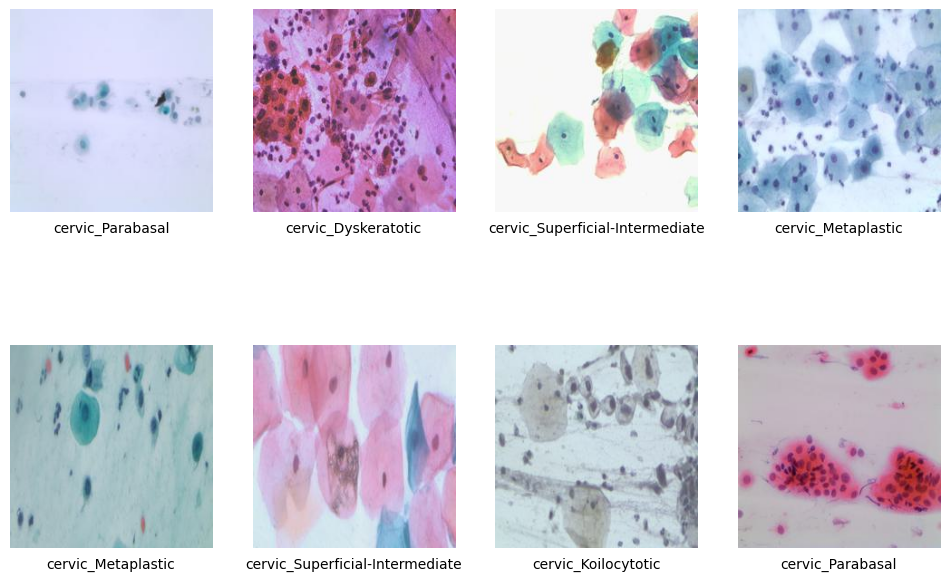

In [ ]:
no_of_rows = 2
no_of_columns = 4

fig, axes = plt.subplots(no_of_rows, no_of_columns, figsize=(12, 8))

for i in range(no_of_rows):
    for j in range(no_of_columns):
        index = i * no_of_columns + j

        if index < len(training_data):

            im = Image.open(training_data.iloc[index]['Path'])

            img = np.array(im)

            print(img.shape)

            axes[i, j].imshow(img)

            axes[i, j].axis('off')

            label = training_data.iloc[index]['Label']
            axes[i, j].text(0.5, -0.1, label, ha='center', transform=axes[i, j].transAxes)

plt.show()

In [ ]:
base_model = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()

model.add(base_model)

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))

model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 4, 4, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1024)                │      16,778,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,456,453 (97.11 MB)

 Trainable params: 18,418,949 (70.26 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  
    metrics=['accuracy']             
)

In [ ]:
history = model.fit(
    train_generator,                                   
    epochs=15,                                         
    validation_data=valid_generator,                   
)

Epoch 1/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 55s 250ms/step - accuracy: 0.4384 - loss: 1.8455 - val_accuracy: 0.8060 - val_loss: 0.5291
Epoch 2/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.7894 - loss: 0.5584 - val_accuracy: 0.8820 - val_loss: 0.3439
Epoch 3/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.8598 - loss: 0.3817 - val_accuracy: 0.9180 - val_loss: 0.2547
Epoch 4/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.8879 - loss: 0.3070 - val_accuracy: 0.8700 - val_loss: 0.3386
Epoch 5/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.9133 - loss: 0.2564 - val_accuracy: 0.9240 - val_loss: 0.2270
Epoch 6/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.9337 - loss: 0.1913 - val_accuracy: 0.9220 - val_loss: 0.2376
Epoch 7/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.9298 - loss: 0.1787 - val_accuracy: 0.9340 - val_loss: 0.1884
Epoch 8/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.9508 - loss: 0.1472 - val_

In [31]:
model.save("cerv.h5")

16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 810ms/step


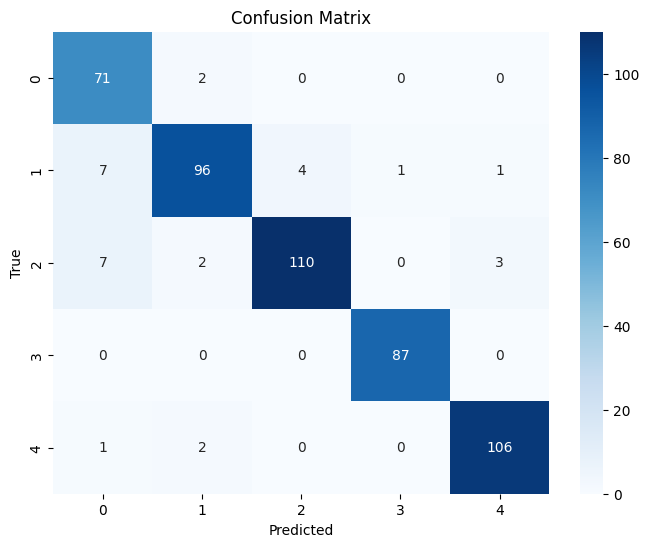

In [ ]:
predictions = model.predict(valid_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = valid_generator.classes

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



In [ ]:
class_report = classification_report(true_labels, predicted_labels)
print(class_report)

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        73
           1       0.94      0.88      0.91       109
           2       0.96      0.90      0.93       122
           3       0.99      1.00      0.99        87
           4       0.96      0.97      0.97       109

    accuracy                           0.94       500
   macro avg       0.94      0.95      0.94       500
weighted avg       0.94      0.94      0.94       500



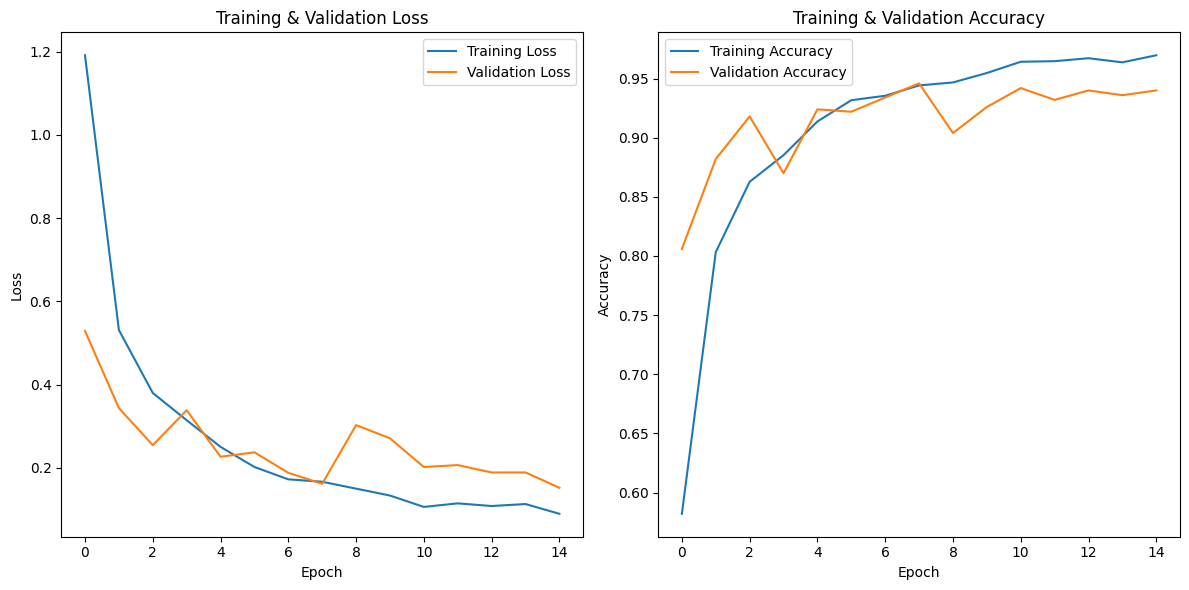

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()